# Worksheet 06

Name:  Jiahang Li
UID: U00295086

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

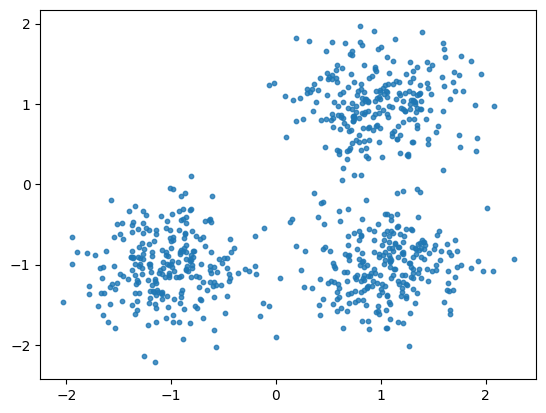

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

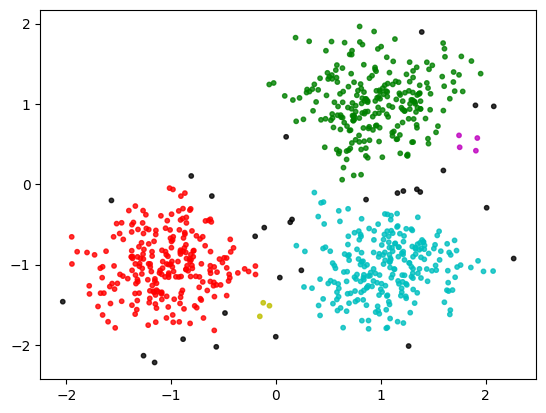

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

UNCLASSIFIED=0
NOISE=-1

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        
    def getdatadisstance(self, datas):
        line,column=np.shape(datas)
        dists=np.zeros([line,line])
        for i in range(0,line):
            for j in range(0, line):
                vi=datas[i,:]
                vj=datas[j,:]
                
                dists[i,j]=np.sqrt(np.dot((vi-vj),(vi-vj)))
        return dists
    
    def find_near_pionts(self, point_id,eps,dists):
       
        index=(dists[point_id]<=eps)
        return np.where(True==index)[0].tolist()

    def expand_cluster(self, dists,labs,cluster_id,seeds,eps,min_points):
        i=0

        while i<len(seeds):
            Pn=seeds[i]
            if labs[Pn]==NOISE:
                labs[Pn]=cluster_id
            elif labs[Pn]==UNCLASSIFIED:

                labs[Pn]=cluster_id

                new_seeds=self.find_near_pionts(Pn,eps,dists)

                if len(new_seeds)>=min_points:
                    seeds=seeds+new_seeds
                else:
                    continue

            i=i+1

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        dists= self.getdatadisstance(self.dataset)

        n_points=self.dataset.shape[0]

        labs=[UNCLASSIFIED]*n_points

        cluster_id=0


        for point_id in range(0,n_points):

            if not(labs[point_id]==UNCLASSIFIED):
                continue
            seeds = self.find_near_pionts(point_id, self.epsilon, dists)  


            if len(seeds)<self.min_pts:
                labs[point_id]=NOISE
            else:

                cluster_id=cluster_id+1
                print(labs)
                labs[point_id]=cluster_id
                self.expand_cluster(dists,labs,cluster_id,seeds,self.epsilon,self.min_pts)
        return labs


clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
print(clustering)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()
